In [4585]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4586]:
import pandas as pd
import numpy as np

In [4587]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [4588]:
url = 'https://raw.githubusercontent.com/pedroteche-ih/DAFT_MEX_202209/main/data/tb_ames_housing.csv'
tb_housing = pd.read_csv(url)

In [4589]:
tb_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## First Contact
Load the dataset and familiarize yourself with column names/contents


In [4590]:
tb_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4591]:
len(tb_housing.columns)

81

In [4592]:
len(tb_housing.select_dtypes(include = 'object').columns)

43

In [4593]:
len(tb_housing.select_dtypes(include = 'number').columns)

38

In [4594]:
tb_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


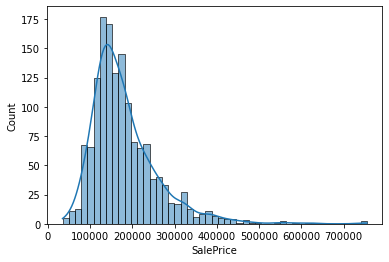

In [4595]:
sns.histplot(data = tb_housing, x = 'SalePrice', kde = True);

In [4596]:
corrs = tb_housing.corr()['SalePrice'].reset_index() 
corrs.sort_values('SalePrice', ascending=False)[1:11].reset_index().drop('level_0', axis=1)

,index,SalePrice
0,OverallQual,0.790982
1,GrLivArea,0.708624
2,GarageCars,0.640409
3,GarageArea,0.623431
4,TotalBsmtSF,0.613581
5,1stFlrSF,0.605852
6,FullBath,0.560664
7,TotRmsAbvGrd,0.533723
8,YearBuilt,0.522897
9,YearRemodAdd,0.507101


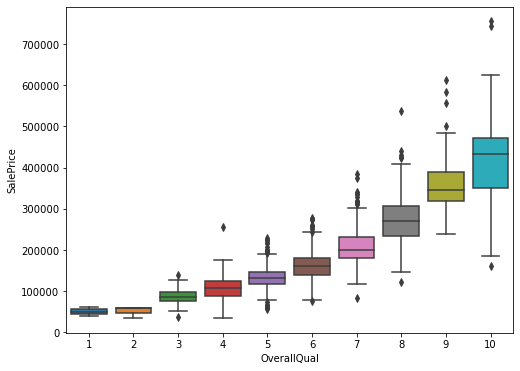

In [4597]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=tb_housing);

In [4598]:
tb_housing.isna().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [4599]:
len(tb_housing)*0.75

1095.0

## Treating NAs
Some columns have missing values - treat your data so we have no more NAs in our table.

In [4600]:
# Drop columns that have more than 50% of missing values (Alley, PoolQC, Fence, MiscFeature)

tb_housing = tb_housing.dropna(axis=1, thresh=tb_housing.shape[0] * 0.5)

In [4601]:
tb_housing.isna().sum().sort_values(ascending=False)[:15]

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

In [4602]:
## Drop columns whose value with the most counts is greater than 70% of the data (low variance threshold)

for col in tb_housing.columns:
    if (tb_housing[col].value_counts().iloc[0] > len(tb_housing)*.70) == True:
        tb_housing.drop(col, axis=1, inplace=True)

In [4603]:
len(tb_housing.columns)

45

In [4604]:
tb_housing.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
## Function to deal with nan's and low variance threshold

def bye_nas(data):
    data = data.dropna(axis=1, thresh=data.shape[0] * 0.5)
    for col in data.columns:
        if (data[col].value_counts().iloc[0] > len(data)*.70) == True:
            data.drop(col, axis=1, inplace=True)
    return data
    

In [4605]:
tb_housing.isna().sum().sort_values(ascending=False)[:10]

FireplaceQu     690
LotFrontage     259
GarageFinish     81
GarageYrBlt      81
GarageType       81
BsmtExposure     38
BsmtFinType1     37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
dtype: int64

In [4606]:
imp_mean = IterativeImputer()

imp_mean.fit(tb_housing[['LotFrontage','LotArea']])
lot_front_transformed = imp_mean.transform(tb_housing[['LotFrontage', 'LotArea']])[:,0]
tb_housing['LotFrontage_Transformed_iterative'] = lot_front_transformed

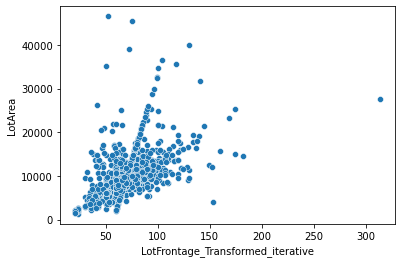

In [4607]:
sns.scatterplot(data=tb_housing[tb_housing['LotArea'] < 50000], x='LotFrontage_Transformed_iterative', y='LotArea');

In [4608]:
tb_housing.drop('LotFrontage', axis=1, inplace=True)

In [4609]:
tb_housing.isna().sum().sort_values(ascending=False)[:9]

FireplaceQu     690
GarageFinish     81
GarageYrBlt      81
GarageType       81
BsmtExposure     38
BsmtFinType1     37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
dtype: int64

In [4610]:
tb_housing['MasVnrType'].fillna((tb_housing['MasVnrType'].mode()[0]), inplace=True)
tb_housing['MasVnrArea'].fillna((tb_housing['MasVnrArea'].median()), inplace=True)

In [4611]:
tb_housing.drop([948], inplace = True)

In [4612]:
tb_housing['BsmtQual'].fillna('NoBasement', inplace=True) 
tb_housing['BsmtExposure'].fillna('NoBasement', inplace=True)
tb_housing['BsmtFinType1'].fillna('NoBasement', inplace=True)

In [4684]:
corrs = tb_housing.corr()['SalePrice'].reset_index() 
numm_corrs = corrs.sort_values('SalePrice', ascending=False)[1:12].reset_index().drop('level_0', axis=1)
num_corrs

,index,SalePrice
0,OverallQual,0.791037
1,GrLivArea,0.708640
2,GarageCars,0.640404
3,GarageArea,0.623436
4,TotalBsmtSF,0.613629
5,1stFlrSF,0.605987
6,FullBath,0.560709
7,TotRmsAbvGrd,0.533713
8,YearBuilt,0.522985
9,YearRemodAdd,0.507142


In [4614]:
tb_housing['GarageType'].fillna('NoGarage', inplace=True)
tb_housing['GarageFinish'].fillna('NoGarage', inplace=True)

In [4615]:
tb_housing.drop('GarageYrBlt', axis=1, inplace=True)

In [4618]:
tb_housing["FireplaceQu"].fillna("NoFireplace", inplace=True)

In [4619]:
tb_housing.isna().sum()

Id                                   0
MSSubClass                           0
LotArea                              0
LotShape                             0
Neighborhood                         0
HouseStyle                           0
OverallQual                          0
OverallCond                          0
YearBuilt                            0
YearRemodAdd                         0
Exterior1st                          0
Exterior2nd                          0
MasVnrType                           0
MasVnrArea                           0
ExterQual                            0
Foundation                           0
BsmtQual                             0
BsmtExposure                         0
BsmtFinType1                         0
BsmtFinSF1                           0
BsmtUnfSF                            0
TotalBsmtSF                          0
HeatingQC                            0
1stFlrSF                             0
2ndFlrSF                             0
GrLivArea                

In [4620]:
len(tb_housing.select_dtypes(include = 'object').columns)

16

## Initial Exploration
Use EDA techniques (correlation graphs, scatterplots, simple modelling techniques) to find a starting feature set from which to build your model.

At the end of this step you must have a variable list which you'll investigate further with feature transformations, outlier treatment and modelling.

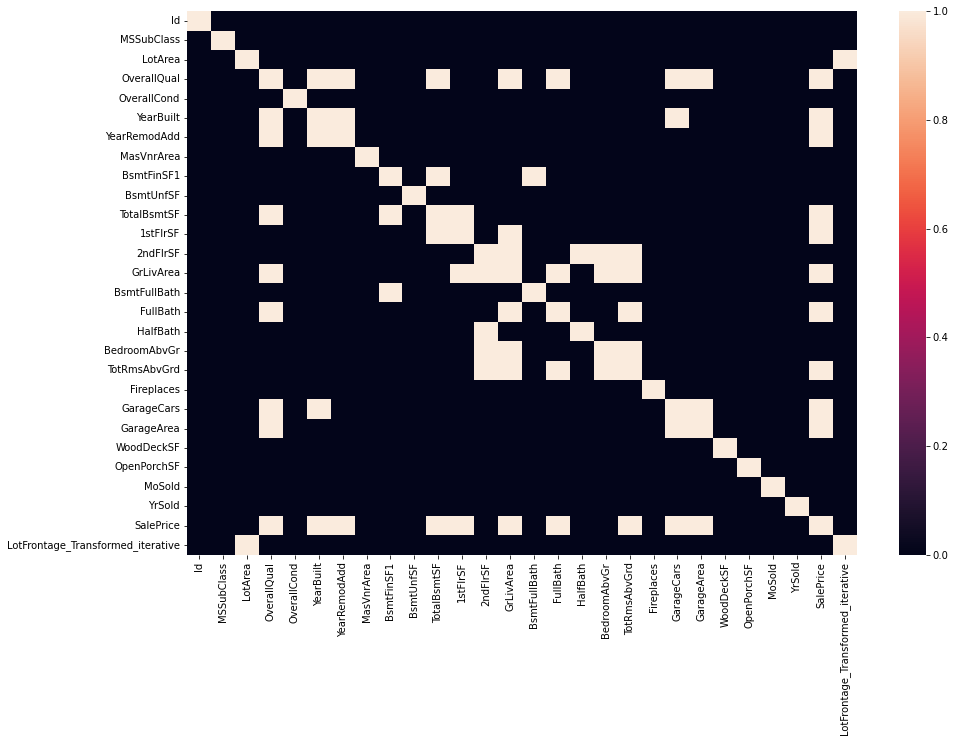

In [4621]:
plt.figure(figsize = (15, 10))
sns.heatmap(tb_housing.corr() > 0.5);

In [4622]:
tb_housing.select_dtypes(include = 'object').columns

Index(['LotShape', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish'],
      dtype='object')

In [4623]:
cat_columns = tb_housing[tb_housing.select_dtypes(include = 'object').columns]
cat_columns

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,Reg,CollgCr,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,NoFireplace,Attchd,RFn
1,Reg,Veenker,1Story,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn
2,IR1,CollgCr,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn
3,IR1,Crawfor,2Story,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf
4,IR1,NoRidge,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Reg,Gilbert,2Story,VinylSd,VinylSd,None,TA,PConc,Gd,No,Unf,Ex,TA,TA,Attchd,RFn
1456,Reg,NWAmes,1Story,Plywood,Plywood,Stone,TA,CBlock,Gd,No,ALQ,TA,TA,TA,Attchd,Unf
1457,Reg,Crawfor,2Story,CemntBd,CmentBd,None,Ex,Stone,TA,No,GLQ,Ex,Gd,Gd,Attchd,RFn
1458,Reg,NAmes,1Story,MetalSd,MetalSd,None,TA,CBlock,TA,Mn,GLQ,Gd,Gd,NoFireplace,Attchd,Unf


In [4624]:
all_nums = pd.get_dummies(cat_columns)
all_nums['SalePrice'] = tb_housing['SalePrice']

In [4625]:
all_nums.head()

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,SalePrice
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,208500
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,181500
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,223500
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,140000
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,250000


In [4626]:
all_nums.shape

(1459, 126)

In [4627]:
corr_cat = all_nums.drop("SalePrice", axis=1).apply(lambda x: x.corr(all_nums['SalePrice'])).reset_index()
corr_cat.sort_values(0, ascending=False)[:10]

,index,0
82,BsmtQual_Ex,0.553156
104,KitchenQual_Ex,0.504137
78,Foundation_PConc,0.497840
74,ExterQual_Gd,0.452637
72,ExterQual_Ex,0.451193
94,BsmtFinType1_GLQ,0.434724
99,HeatingQC_Ex,0.434593
121,GarageFinish_Fin,0.419783
20,Neighborhood_NridgHt,0.402183
110,FireplaceQu_Gd,0.339431


In [4628]:
new_tb_housing = pd.concat([all_nums.loc[:, all_nums.columns != 'SalePrice'],
                                             tb_housing.select_dtypes(include = 'number')], axis=1)
new_tb_housing

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,LotFrontage_Transformed_iterative
0,0,0,0,1,0,0,0,0,0,1,...,8,0,2,548,0,61,2,2008,208500,65.0
1,0,0,0,1,0,0,0,0,0,0,...,6,1,2,460,298,0,5,2007,181500,80.0
2,1,0,0,0,0,0,0,0,0,1,...,6,1,2,608,0,42,9,2008,223500,68.0
3,1,0,0,0,0,0,0,0,0,0,...,7,1,3,642,0,35,2,2006,140000,60.0
4,1,0,0,0,0,0,0,0,0,0,...,9,1,3,836,192,84,12,2008,250000,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,0,0,0,...,7,1,2,460,0,40,8,2007,175000,62.0
1456,0,0,0,1,0,0,0,0,0,0,...,7,2,2,500,349,0,2,2010,210000,85.0
1457,0,0,0,1,0,0,0,0,0,0,...,9,2,1,252,0,60,5,2010,266500,66.0
1458,0,0,0,1,0,0,0,0,0,0,...,5,0,1,240,366,0,4,2010,142125,68.0


In [ ]:
## Get dummies for categorical features and concatenate them with the numerical features of the df
## to perform an overall correlation with target variable.

def dummies_concat(data):
    cat_columns = data[data.select_dtypes(include = 'object').columns]
    all_nums_coll = pd.get_dummies(cat_columns)
    all_nums_coll['SalePrice'] = data['SalePrice']
    
    new_tb_housing = pd.concat([all_nums_coll.loc[:, all_nums_coll.columns != 'SalePrice'],
                                             data.select_dtypes(include = 'number')], axis=1)
    
    return new_tb_housing

In [4629]:
corr_num_cat = new_tb_housing.corr()['SalePrice'].reset_index() 
linear_sorted_corr = corr_num_cat.sort_values('SalePrice', ascending=False)[1:16].reset_index().drop('level_0', axis=1)
linear_sorted_corr

,index,SalePrice
0,OverallQual,0.791037
1,GrLivArea,0.708640
2,GarageCars,0.640404
3,GarageArea,0.623436
4,TotalBsmtSF,0.613629
5,1stFlrSF,0.605987
6,FullBath,0.560709
7,BsmtQual_Ex,0.553156
8,TotRmsAbvGrd,0.533713
9,YearBuilt,0.522985


In [4630]:
linear_sorted_corr['index'].values

array(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex',
       'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'KitchenQual_Ex',
       'Foundation_PConc', 'MasVnrArea', 'Fireplaces'], dtype=object)

In [4683]:
corr_num_cat = new_tb_housing.corr(method='spearman')['SalePrice'].reset_index() 
spear_sorted_corr = corr_num_cat.sort_values('SalePrice', ascending=False)[1:18].reset_index().drop('level_0', axis=1)
spear_sorted_corr

,index,SalePrice
0,OverallQual,0.809723
1,GrLivArea,0.731217
2,GarageCars,0.690702
3,YearBuilt,0.652586
4,GarageArea,0.649493
5,FullBath,0.635835
6,TotalBsmtSF,0.602953
7,1stFlrSF,0.575871
8,ExterQual_Gd,0.574432
9,YearRemodAdd,0.571112


In [4632]:
spear_sorted_corr['index'].values

array(['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt',
       'GarageArea', 'FullBath', 'TotalBsmtSF', '1stFlrSF',
       'ExterQual_Gd', 'YearRemodAdd', 'Foundation_PConc', 'TotRmsAbvGrd',
       'Fireplaces', 'HeatingQC_Ex', 'KitchenQual_Gd'], dtype=object)

## Outlier Treatment
Filter outliers in your selected features and target variable - remember you can use Feature Transformations such as PowerTransformer and the logarithm to treat outliers without removing them!

In [4633]:
## LotArea

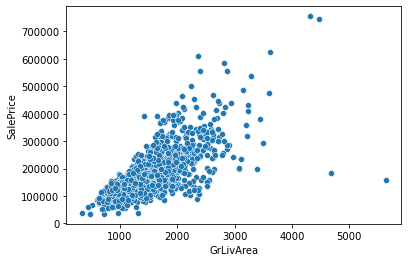

In [4634]:
sns.scatterplot(data = new_tb_housing, x = 'GrLivArea', y = 'SalePrice');

In [4635]:
## Removing extreme outliers from numeric columns using IQR

q25 = np.quantile(new_tb_housing['GrLivArea'], 0.25)
q75 = np.quantile(new_tb_housing['GrLivArea'], 0.75)
IQR = q75 - q25
mask = (new_tb_housing['GrLivArea'] > (q75 + 3 * IQR)) | (new_tb_housing['GrLivArea'] < (q25 - 3 * IQR))
new_out_housing = new_tb_housing[~mask]

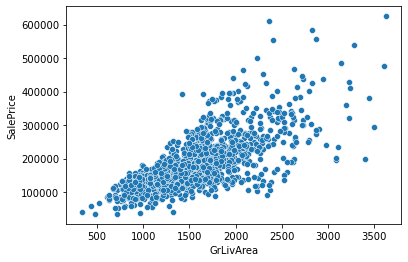

In [4636]:
sns.scatterplot(data = new_out_housing, x = 'GrLivArea', y = 'SalePrice');

In [4637]:
len(new_out_housing) # Without outliers

1455

In [4638]:
len(new_tb_housing) # With outliers

1459

In [4639]:
for col in new_tb_housing[num_corrs['index'].values]:
    q25 = np.quantile(new_tb_housing[col], 0.25)
    q75 = np.quantile(new_tb_housing[col], 0.75)
    IQR = q75 - q25
    mask = (new_tb_housing[col] > (q75 + 3 * IQR)) | (new_tb_housing[col] < (q25 - 3 * IQR))
    new_out_housing = new_out_housing[~mask]

In [4640]:
len(new_out_housing)

1424

In [4641]:
len(new_tb_housing)

1459

In [4643]:
data_ready = new_out_housing[linear_sorted_corr['index'].values]

In [4644]:
data_ready.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,BsmtQual_Ex,TotRmsAbvGrd,YearBuilt,YearRemodAdd,KitchenQual_Ex,Foundation_PConc,MasVnrArea,Fireplaces
0,7,1710,2,548,856,856,2,0,8,2003,2003,0,1,196.0,0
1,6,1262,2,460,1262,1262,2,0,6,1976,1976,0,0,0.0,1
2,7,1786,2,608,920,920,2,0,6,2001,2002,0,1,162.0,1
3,7,1717,3,642,756,961,1,0,7,1915,1970,0,0,0.0,1
4,8,2198,3,836,1145,1145,2,0,9,2000,2000,0,1,350.0,1


In [4645]:
from sklearn.model_selection import train_test_split

In [4646]:
X = data_ready
y = new_out_housing['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Feature Transformation/Creation

In [4647]:
from sklearn.preprocessing import PowerTransformer

In [4648]:
# Treat mild outliers with PowerTransformer (make data more Gaussian-like)

pt = PowerTransformer()

pt.fit(X_train)

In [4649]:
X_train_trans = pt.transform(X_train)
X_test_trans = pt.transform(X_test)

In [4650]:
train_data_ready = pd.DataFrame(X_train_trans, columns=pt.get_feature_names_out())
train_data_ready

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,BsmtQual_Ex,TotRmsAbvGrd,YearBuilt,YearRemodAdd,KitchenQual_Ex,Foundation_PConc,MasVnrArea,Fireplaces
0,1.514372,0.543077,1.811512,1.755630,1.622913,1.465899,0.759916,3.457535,0.356097,1.229783,1.075462,4.399675,1.131371,1.283923,0.892470
1,0.766158,0.535392,0.270032,-0.419589,-0.102821,-0.348566,0.759916,-0.289223,0.356097,1.229783,1.001293,-0.227289,1.131371,0.912473,-0.958927
2,-0.003747,-0.042450,0.270032,0.508578,0.973568,0.885980,0.759916,-0.289223,0.356097,-0.373135,-1.076214,-0.227289,-0.883883,1.290845,0.892470
3,0.766158,0.440307,0.270032,0.122534,-0.448042,-0.853792,0.759916,-0.289223,0.356097,1.133982,0.856982,-0.227289,1.131371,1.072561,-0.958927
4,-0.003747,-0.559603,-2.205058,-2.605020,-0.273028,0.023159,-1.032745,-0.289223,0.356097,-1.540461,0.583813,-0.227289,-0.883883,-0.829698,-0.958927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,0.766158,-0.136161,0.270032,0.108405,-0.853041,-1.550884,0.759916,-0.289223,-0.292880,1.040015,0.717883,-0.227289,1.131371,-0.829698,-0.958927
1135,-0.799238,-1.309293,-1.087537,-0.557491,-0.245745,-0.549360,-1.032745,-0.289223,-1.809762,-0.437978,-1.144876,-0.227289,-0.883883,-0.829698,-0.958927
1136,0.766158,0.240566,0.270032,0.494778,1.280546,1.172015,0.759916,3.457535,0.356097,1.181651,0.928475,-0.227289,1.131371,-0.829698,-0.958927
1137,0.766158,-0.162643,0.270032,0.056485,0.188288,0.761064,0.759916,-0.289223,-0.292880,0.043886,-0.605612,-0.227289,-0.883883,1.221029,0.892470


### Modeling

In [4651]:
from sklearn.linear_model import LinearRegression

In [4652]:
housing_model = LinearRegression()

In [4653]:
housing_model.fit(X_train_trans, y_train)

print(housing_model.intercept_)

176068.20684510985


In [4654]:
from sklearn.metrics import r2_score

In [4655]:
y_pred = housing_model.predict(X_test_trans)
r2_score(y_pred, y_test)

0.8184238191619595

In [4656]:
y_pred

array([232212.08406069,  28671.0466228 , 207918.60077668, 132046.12760329,
       117579.03624313, 196916.28974397,  49851.27979397, 165746.68749806,
       191030.12519399, 187613.35462819, 109778.92964794, 111867.57606503,
       218729.55153465, 245404.87603347, 222789.12281002, 119449.99918374,
       152904.03466352, 173901.39968498, 164782.73773242, 167077.35693954,
       300406.86586829, 132281.14506153, 102620.74699987, 133395.1037288 ,
       177785.74839994, 107343.51609012, 107655.60191024, 242988.19656848,
       172739.85429707, 330084.46869224, 142961.17220636, 132991.02935565,
       152696.571583  , 303435.83067965, 127811.46425238, 179856.26354398,
       114247.73595487, 143803.54427877,  96801.50713174, 213414.47135982,
       139047.09036732, 246471.91873409, 221820.37915627, 253822.57051934,
       113883.34039348, 299895.04159417, 127159.11039796, 179242.53786665,
       171088.46604012, 113406.8546779 , 129364.74972688, 167034.05807855,
       135725.6528149 , 1

In [4657]:
from sklearn.metrics import mean_squared_error

In [4658]:
y_pred = housing_model.predict(X_test_trans)

np.sqrt(mean_squared_error(y_test, y_pred))

27273.646480859337

In [4659]:
true_prices = pd.DataFrame(y_test)
true_prices['Predictions'] = y_pred

In [4660]:
true_prices

,SalePrice,Predictions
244,205000,232212.084061
1321,72500,28671.046623
143,204000,207918.600777
170,128500,132046.127603
228,125000,117579.036243
...,...,...
1438,149700,169963.206196
1196,219210,226931.969217
828,185000,179248.876331
1001,86000,103999.171454


In [4661]:
import catboost as cat

In [4662]:
cat_fit = cat.CatBoostRegressor(iterations=20000, depth=3, od_type="Iter", od_wait=500)
cat_fit.fit(X_train_trans, y_train, eval_set=(X_test_trans, y_test))

Learning rate set to 0.008359
0:	learn: 71829.7671882	test: 65524.9254353	best: 65524.9254353 (0)	total: 931us	remaining: 18.6s
1:	learn: 71476.7910574	test: 65155.1104668	best: 65155.1104668 (1)	total: 1.8ms	remaining: 18s
2:	learn: 71141.4912274	test: 64860.5928405	best: 64860.5928405 (2)	total: 2.9ms	remaining: 19.4s
3:	learn: 70805.4844211	test: 64527.6513938	best: 64527.6513938 (3)	total: 3.97ms	remaining: 19.8s
4:	learn: 70447.8049604	test: 64191.3718534	best: 64191.3718534 (4)	total: 4.94ms	remaining: 19.8s
5:	learn: 70101.0021978	test: 63871.6358419	best: 63871.6358419 (5)	total: 5.79ms	remaining: 19.3s
6:	learn: 69750.3994731	test: 63546.1015307	best: 63546.1015307 (6)	total: 6.41ms	remaining: 18.3s
7:	learn: 69394.8913080	test: 63223.8933446	best: 63223.8933446 (7)	total: 7.12ms	remaining: 17.8s
8:	learn: 69032.8447836	test: 62863.1761071	best: 62863.1761071 (8)	total: 7.76ms	remaining: 17.2s
9:	learn: 68691.2701321	test: 62558.8634784	best: 62558.8634784 (9)	total: 8.38ms	re

In [4663]:
y_pred = cat_fit.predict(X_test_trans)
y_pred_rounded = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
y_pred_rounded

23828.03

In [4664]:
np.round((y_pred_rounded / y_test.mean())*100, 2) # percentage error

13.54

In [4665]:
# Si mi modelo predice que una casa cuesta $100k, entonces hay un porcentaje de error del 14%, 
# que signifca que el verdadero precio está entre 14.5% más abajo y 14.5% más arriba del precio más arriba
# ($876k y $114k)

In [4666]:
from sklearn.ensemble import RandomForestRegressor

In [4667]:
rf_fit = RandomForestRegressor(n_estimators=1000, max_depth=15)  
rf_fit.fit(X_train_trans, y_train)

RandomForestRegressor(max_depth=15, n_estimators=1000)

In [4668]:
y_pred_rf = rf_fit.predict(X_test_trans)

In [4669]:
np.round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 2)

25090.89

### Different # of variables for Linear Regression using a linear correlation

In [4670]:
def best_rmse_linear_corr(clean_df):
    k = 6
    linear_corr_list = []

    for i in range(26):
    
        # Getting most linear correlated features
        corr_num_cat = clean_df.corr()['SalePrice'].reset_index() 
        linear_sorted_corr = corr_num_cat.sort_values('SalePrice', ascending=False)[1:k].reset_index().drop('level_0', axis=1)
        columns = linear_sorted_corr['index'].values
        data_ready = clean_df[columns]
        
        # Splitting data
        X = data_ready
        y = clean_df['SalePrice']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3) # Random state 
        # to guarantee that the split will be always the same.
    
        # Transformation
        pt = PowerTransformer()
        X_train_trans = pt.fit(X_train)
        X_test_trans = pt.fit(X_test)
        X_train_trans = pt.transform(X_train)
        X_test_trans = pt.transform(X_test)
    
        # Creating and fitting the model
        housing_model = LinearRegression()
        housing_model.fit(X_train_trans, y_train)
    
        # Prediction and evaluation
        y_pred = housing_model.predict(X_test_trans)
        linear_corr_list.append((k-1, np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)))
        
        k += 1
    
    # Sort number of variables by best RMSE
    sorted_list = sorted(linear_corr_list, key=lambda x: x[1])
    
    # Storing results into a Pandas DataFrame                            
    results = pd.DataFrame(sorted_list, columns=['# of Vars', 'RMSE']).set_index('# of Vars')
        
    return results

In [4671]:
best_rmse_linear_corr(new_out_housing)

,RMSE
# of Vars,
28,25583.7712
30,25689.3254
29,25700.3252
26,25825.7872
25,25839.6084
27,25853.9778
24,25884.2358
23,25903.3982
20,26184.5761


### Different # of variables considering linear correlations (CatBoost)

In [4678]:
def best_rmse_linear_corr_catmodel(clean_df):
    k = 6 # Number of variables
    linear_corr_list = []

    for i in range(26):
    
        # Getting most linear correlated features
        corr_num_cat = clean_df.corr()['SalePrice'].reset_index() 
        linear_sorted_corr = corr_num_cat.sort_values('SalePrice', ascending=False)[1:k].reset_index().drop('level_0', axis=1)
        columns = linear_sorted_corr['index'].values
        data_ready = clean_df[columns]
        
        # Splitting data
        X = data_ready
        y = clean_df['SalePrice']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)
    
        # Transformation
        pt = PowerTransformer()
        X_train_trans = pt.fit(X_train)
        X_test_trans = pt.fit(X_test)
        X_train_trans = pt.transform(X_train)
        X_test_trans = pt.transform(X_test)
    
        # Creating and fitting the model (catboost!)
        cat_fit = cat.CatBoostRegressor(iterations=20000, depth=3, od_type="Iter", od_wait=500, verbose=False)
        cat_fit.fit(X_train_trans, y_train, eval_set=(X_test_trans, y_test))
    
        # Prediction and evaluation
        y_pred = cat_fit.predict(X_test_trans)
        linear_corr_list.append((k-1, np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)))
        
        k += 1
    
    # Sort number of variables by best RMSE
    sorted_list = sorted(linear_corr_list, key=lambda x: x[1])
    
    # Storing results into a Pandas DataFrame                            
    results = pd.DataFrame(sorted_list, columns=['# of Vars', 'RMSE']).set_index('# of Vars')
        
    return results
    

In [4679]:
best_rmse_linear_corr_catmodel(new_out_housing)

,RMSE
# of Vars,
24,20997.6963
27,21060.4994
26,21071.3750
28,21265.6978
25,21299.7850
23,21309.3651
29,21361.6451
30,21474.0044
16,22177.8517


### Different # of variables considering non-linear correlations (CatBoost)

In [4674]:
def best_rmse_nonlinear_corr_catmodel(clean_df):
    k = 6 # Number of variables
    non_linear_corr_list = []

    for i in range(26):
    
        # Getting most non-linear correlated features
        corr_num_cat = clean_df.corr(method='spearman')['SalePrice'].reset_index() 
        non_linear_sorted_corr = corr_num_cat.sort_values('SalePrice', ascending=False)[1:k].reset_index().drop('level_0', axis=1)
        columns = non_linear_sorted_corr['index'].values
        data_ready = clean_df[columns]
        
        # Splitting data
        X = data_ready
        y = clean_df['SalePrice']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)
    
        # Transformation
        pt = PowerTransformer()
        X_train_trans = pt.fit(X_train)
        X_test_trans = pt.fit(X_test)
        X_train_trans = pt.transform(X_train)
        X_test_trans = pt.transform(X_test)
    
        # Creating and fitting the model (catboost!)
        cat_fit = cat.CatBoostRegressor(iterations=20000, depth=3, od_type="Iter", od_wait=500, verbose=False)
        cat_fit.fit(X_train_trans, y_train, eval_set=(X_test_trans, y_test))
    
        # Prediction and evaluation
        y_pred = cat_fit.predict(X_test_trans)
        non_linear_corr_list.append((k-1, np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)))
        
        k += 1
    
    # Sort number of variables by best RMSE
    sorted_list = sorted(non_linear_corr_list, key=lambda x: x[1])

    # Storing results into a Pandas DataFrame                            
    results = pd.DataFrame(sorted_list, columns=['# of Vars', 'RMSE']).set_index('# of Vars')
    
    return results
    

In [4675]:
best_rmse_nonlinear_corr_catmodel(new_out_housing)

,RMSE
# of Vars,
29,21244.5173
26,21281.8031
28,21360.4697
24,21430.9938
30,21530.9451
27,21545.5475
25,21636.4808
22,21763.6035
21,21766.6647


### Different # of variables considering non-linear correlations (Random Forest)

In [4676]:
def best_rmse_nonlinear_corr_rforest(clean_df):
    k = 6 # Number of variables
    non_linear_corr_list = []

    for i in range(26):
    
        # Getting most non-linear correlated features
        corr_num_cat = clean_df.corr(method='spearman')['SalePrice'].reset_index() 
        non_linear_sorted_corr = corr_num_cat.sort_values('SalePrice', ascending=False)[1:k].reset_index().drop('level_0', axis=1)
        columns = non_linear_sorted_corr['index'].values
        data_ready = clean_df[columns]
        
        # Splitting data
        X = data_ready
        y = clean_df['SalePrice']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)
    
        # Transformation
        pt = PowerTransformer()
        X_train_trans = pt.fit(X_train)
        X_test_trans = pt.fit(X_test)
        X_train_trans = pt.transform(X_train)
        X_test_trans = pt.transform(X_test)
    
        # Creating and fitting the model (random forest)
        max_depth = [3, 5, 8, 10, 12, 15]
        for j in max_depth:
            rf_fit = RandomForestRegressor(n_estimators=1000, max_depth=j)  
            rf_fit.fit(X_train_trans, y_train)
            
            # Prediction and evaluation
            y_pred_knn = rf_fit.predict(X_test_trans)
            non_linear_corr_list.append((k-1, j, np.round(np.sqrt(mean_squared_error(y_test, y_pred_knn)), 4)))
                
        k += 1
    
        # Sort number of variables by best RMSE
        sorted_list = sorted(non_linear_corr_list, key=lambda x: x[2])
        
        # Storing results into a Pandas DataFrame                            
        results = pd.DataFrame(sorted_list, columns=['# of Vars', 'Max Depth', 'RMSE']).set_index('# of Vars')
        
    return results[:20]
    

In [4677]:
best_rmse_nonlinear_corr_rforest(new_out_housing)

,Max Depth,RMSE
# of Vars,,
20,10,23395.8463
20,12,23396.3310
22,10,23433.4677
21,12,23433.7021
19,12,23434.1195
19,10,23456.0655
21,10,23467.3051
26,15,23480.4071
22,12,23483.1318
